In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [263]:
df=pd.read_csv('loan churn train.csv')
test=pd.read_csv('loan churn test.csv')
copy=pd.read_csv('loan churn test.csv')

In [264]:
test.shape

(110023, 13)

In [265]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [266]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [267]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [269]:
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [270]:
df['Exited'].value_counts().sum()

165034

<Axes: xlabel='Geography', ylabel='Count'>

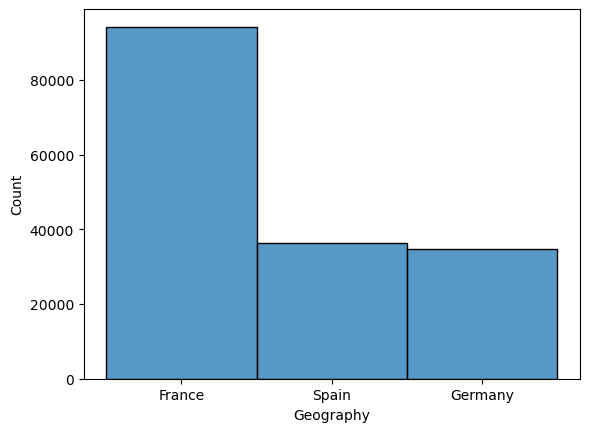

In [271]:
sns.histplot(df['Geography'])

In [272]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

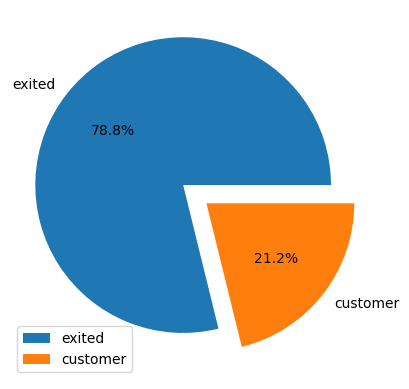

In [273]:
unique_value, count = np.unique(df['Exited'],return_counts=True)
explode = [0.1]*len(count)
plt.pie(x=count, labels= ["exited","customer"],autopct= '%1.1f%%',explode= explode)
plt.legend()

In [274]:
from sklearn.preprocessing import LabelEncoder

In [275]:
le= LabelEncoder()

In [276]:
df['Gender']=le.fit_transform(df["Gender"])
df['Geography']=le.fit_transform(df["Geography"])

In [ ]:
sns.pairplot(df,hue='Exited')

KeyboardInterrupt: 

In [ ]:
sns.heatmap(df.corr())

In [153]:
from sklearn.decomposition import PCA

In [154]:
pcal=PCA(n_components=0.50)

In [155]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [156]:
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=123, test_size=0.2, stratify=y)

In [157]:
pcal.fit_transform(x_train,y_train)

array([[ 98978.20856283],
       [110688.50803906],
       [ 65400.39397393],
       ...,
       [ 55947.3162622 ],
       [-54288.0523034 ],
       [-55603.2902642 ]])

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
lr=RandomForestClassifier(max_depth=8, max_features= 1.0, max_samples= 0.75, n_estimators= 20)

In [160]:
lr.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=1.0, max_samples=0.75,
                       n_estimators=20)

In [161]:
y_pred=lr.predict(x_test)

In [162]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [163]:
confusion_matrix(y_test,y_pred)

array([[24762,  1261],
       [ 3302,  3682]], dtype=int64)

In [164]:
 accuracy_score(y_pred,y_test)

0.8617565970854667

In [165]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     26023
           1       0.74      0.53      0.62      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.74      0.77     33007
weighted avg       0.85      0.86      0.85     33007



In [166]:
copy.shape

(110023, 13)

In [167]:
from xgboost import XGBClassifier

In [168]:
model = XGBClassifier(
    colsample_bytree=0.8,
    eta=0.1,
    eval_metric='logloss',
    max_depth=3,
    objective='binary:logistic',
    subsample=0.8
)

In [169]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [170]:
xy_pred=model.predict(x_test)

In [171]:
print(accuracy_score(xy_pred,y_test))

0.8622716393492289


In [172]:
params = {
    'objective': ['binary:logistic'],  # Binary classification
    'eval_metric': ['logloss'],  # Evaluation metric
    'eta': [0.1],  # Learning rate
    'max_depth': [3],  # Maximum depth of a tree
    'subsample': [0.8],  # Subsample ratio of the training instance
    'colsample_bytree':[ 0.8]  # Subsample ratio of columns when constructing each tree
}

In [173]:
xgb_grid= GridSearchCV(estimator=model, param_grid= params, cv=5, n_jobs=-1, verbose= 2)
            

In [174]:
xgb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eta=0.1,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learnin...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'eta': [0.1],
                         'eval_metric': ['logloss'], 'max_depth': [3],
                         'objective': ['binary:logistic'], 'subsample': [0.8]},
             verbose=2)

In [175]:
xgb_grid.best_params_

{'colsample_bytree': 0.8,
 'eta': 0.1,
 'eval_metric': 'logloss',
 'max_depth': 3,
 'objective': 'binary:logistic',
 'subsample': 0.8}

In [176]:
xgb_grid.best_score_

0.8649972885638808

In [177]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [178]:
from catboost import CatBoostClassifier

In [179]:
cb= CatBoostClassifier(loss_function='MultiClass')

In [180]:
cb.fit(x_train,y_train)

Learning rate set to 0.101503
0:	learn: 0.6385226	total: 86.5ms	remaining: 1m 26s
1:	learn: 0.5935937	total: 159ms	remaining: 1m 19s
2:	learn: 0.5558302	total: 230ms	remaining: 1m 16s
3:	learn: 0.5247155	total: 293ms	remaining: 1m 12s
4:	learn: 0.4981858	total: 358ms	remaining: 1m 11s
5:	learn: 0.4762820	total: 439ms	remaining: 1m 12s
6:	learn: 0.4572416	total: 504ms	remaining: 1m 11s
7:	learn: 0.4401102	total: 567ms	remaining: 1m 10s
8:	learn: 0.4257443	total: 631ms	remaining: 1m 9s
9:	learn: 0.4132655	total: 708ms	remaining: 1m 10s
10:	learn: 0.4018593	total: 774ms	remaining: 1m 9s
11:	learn: 0.3926611	total: 837ms	remaining: 1m 8s
12:	learn: 0.3846849	total: 899ms	remaining: 1m 8s
13:	learn: 0.3778684	total: 973ms	remaining: 1m 8s
14:	learn: 0.3708884	total: 1.04s	remaining: 1m 8s
15:	learn: 0.3655284	total: 1.11s	remaining: 1m 8s
16:	learn: 0.3606153	total: 1.18s	remaining: 1m 7s
17:	learn: 0.3557804	total: 1.25s	remaining: 1m 8s
18:	learn: 0.3522363	total: 1.31s	remaining: 1m 7s
1

164:	learn: 0.3148755	total: 10.8s	remaining: 54.8s
165:	learn: 0.3148417	total: 10.9s	remaining: 54.8s
166:	learn: 0.3148103	total: 11s	remaining: 54.7s
167:	learn: 0.3147670	total: 11s	remaining: 54.6s
168:	learn: 0.3147185	total: 11.1s	remaining: 54.6s
169:	learn: 0.3146894	total: 11.2s	remaining: 54.5s
170:	learn: 0.3146686	total: 11.2s	remaining: 54.4s
171:	learn: 0.3146271	total: 11.3s	remaining: 54.3s
172:	learn: 0.3145864	total: 11.3s	remaining: 54.3s
173:	learn: 0.3145612	total: 11.4s	remaining: 54.1s
174:	learn: 0.3145286	total: 11.5s	remaining: 54s
175:	learn: 0.3144831	total: 11.5s	remaining: 53.9s
176:	learn: 0.3144619	total: 11.6s	remaining: 53.9s
177:	learn: 0.3144117	total: 11.7s	remaining: 53.8s
178:	learn: 0.3143763	total: 11.7s	remaining: 53.7s
179:	learn: 0.3143494	total: 11.8s	remaining: 53.7s
180:	learn: 0.3143164	total: 11.9s	remaining: 53.7s
181:	learn: 0.3142795	total: 11.9s	remaining: 53.6s
182:	learn: 0.3142488	total: 12s	remaining: 53.5s
183:	learn: 0.314221

323:	learn: 0.3101500	total: 21.6s	remaining: 45s
324:	learn: 0.3101270	total: 21.6s	remaining: 44.9s
325:	learn: 0.3101156	total: 21.7s	remaining: 44.9s
326:	learn: 0.3100727	total: 21.8s	remaining: 44.8s
327:	learn: 0.3100574	total: 21.8s	remaining: 44.7s
328:	learn: 0.3100251	total: 21.9s	remaining: 44.6s
329:	learn: 0.3099842	total: 22s	remaining: 44.6s
330:	learn: 0.3099591	total: 22s	remaining: 44.5s
331:	learn: 0.3099163	total: 22.1s	remaining: 44.4s
332:	learn: 0.3098902	total: 22.2s	remaining: 44.4s
333:	learn: 0.3098568	total: 22.2s	remaining: 44.3s
334:	learn: 0.3098416	total: 22.3s	remaining: 44.3s
335:	learn: 0.3098168	total: 22.4s	remaining: 44.2s
336:	learn: 0.3097986	total: 22.4s	remaining: 44.1s
337:	learn: 0.3097812	total: 22.5s	remaining: 44s
338:	learn: 0.3097537	total: 22.6s	remaining: 44s
339:	learn: 0.3097306	total: 22.6s	remaining: 43.9s
340:	learn: 0.3097026	total: 22.7s	remaining: 43.8s
341:	learn: 0.3096895	total: 22.7s	remaining: 43.7s
342:	learn: 0.3096651	

482:	learn: 0.3063581	total: 31.8s	remaining: 34s
483:	learn: 0.3063339	total: 31.9s	remaining: 34s
484:	learn: 0.3063139	total: 31.9s	remaining: 33.9s
485:	learn: 0.3062928	total: 32s	remaining: 33.8s
486:	learn: 0.3062709	total: 32.1s	remaining: 33.8s
487:	learn: 0.3062626	total: 32.1s	remaining: 33.7s
488:	learn: 0.3062441	total: 32.2s	remaining: 33.6s
489:	learn: 0.3062143	total: 32.2s	remaining: 33.6s
490:	learn: 0.3061882	total: 32.3s	remaining: 33.5s
491:	learn: 0.3061686	total: 32.4s	remaining: 33.4s
492:	learn: 0.3061460	total: 32.4s	remaining: 33.3s
493:	learn: 0.3061109	total: 32.5s	remaining: 33.3s
494:	learn: 0.3060922	total: 32.5s	remaining: 33.2s
495:	learn: 0.3060772	total: 32.6s	remaining: 33.1s
496:	learn: 0.3060496	total: 32.7s	remaining: 33.1s
497:	learn: 0.3060301	total: 32.7s	remaining: 33s
498:	learn: 0.3060070	total: 32.8s	remaining: 32.9s
499:	learn: 0.3059851	total: 32.9s	remaining: 32.9s
500:	learn: 0.3059701	total: 32.9s	remaining: 32.8s
501:	learn: 0.305950

641:	learn: 0.3030793	total: 42.2s	remaining: 23.5s
642:	learn: 0.3030520	total: 42.3s	remaining: 23.5s
643:	learn: 0.3030379	total: 42.3s	remaining: 23.4s
644:	learn: 0.3030146	total: 42.4s	remaining: 23.3s
645:	learn: 0.3029917	total: 42.5s	remaining: 23.3s
646:	learn: 0.3029740	total: 42.5s	remaining: 23.2s
647:	learn: 0.3029458	total: 42.6s	remaining: 23.1s
648:	learn: 0.3029311	total: 42.6s	remaining: 23.1s
649:	learn: 0.3029188	total: 42.7s	remaining: 23s
650:	learn: 0.3028983	total: 42.8s	remaining: 22.9s
651:	learn: 0.3028812	total: 42.8s	remaining: 22.9s
652:	learn: 0.3028619	total: 42.9s	remaining: 22.8s
653:	learn: 0.3028476	total: 43s	remaining: 22.7s
654:	learn: 0.3028300	total: 43s	remaining: 22.7s
655:	learn: 0.3028138	total: 43.1s	remaining: 22.6s
656:	learn: 0.3027906	total: 43.2s	remaining: 22.5s
657:	learn: 0.3027743	total: 43.2s	remaining: 22.5s
658:	learn: 0.3027481	total: 43.3s	remaining: 22.4s
659:	learn: 0.3027291	total: 43.3s	remaining: 22.3s
660:	learn: 0.3027

802:	learn: 0.3000855	total: 52.6s	remaining: 12.9s
803:	learn: 0.3000751	total: 52.7s	remaining: 12.8s
804:	learn: 0.3000500	total: 52.7s	remaining: 12.8s
805:	learn: 0.3000284	total: 52.8s	remaining: 12.7s
806:	learn: 0.3000092	total: 52.9s	remaining: 12.6s
807:	learn: 0.2999979	total: 52.9s	remaining: 12.6s
808:	learn: 0.2999820	total: 53s	remaining: 12.5s
809:	learn: 0.2999643	total: 53s	remaining: 12.4s
810:	learn: 0.2999561	total: 53.1s	remaining: 12.4s
811:	learn: 0.2999279	total: 53.2s	remaining: 12.3s
812:	learn: 0.2999153	total: 53.2s	remaining: 12.2s
813:	learn: 0.2999048	total: 53.3s	remaining: 12.2s
814:	learn: 0.2998763	total: 53.4s	remaining: 12.1s
815:	learn: 0.2998550	total: 53.4s	remaining: 12s
816:	learn: 0.2998317	total: 53.5s	remaining: 12s
817:	learn: 0.2998145	total: 53.5s	remaining: 11.9s
818:	learn: 0.2997963	total: 53.6s	remaining: 11.8s
819:	learn: 0.2997719	total: 53.7s	remaining: 11.8s
820:	learn: 0.2997571	total: 53.7s	remaining: 11.7s
821:	learn: 0.299740

962:	learn: 0.2973407	total: 1m 3s	remaining: 2.44s
963:	learn: 0.2973267	total: 1m 3s	remaining: 2.37s
964:	learn: 0.2973164	total: 1m 3s	remaining: 2.3s
965:	learn: 0.2973012	total: 1m 3s	remaining: 2.24s
966:	learn: 0.2972855	total: 1m 3s	remaining: 2.17s
967:	learn: 0.2972740	total: 1m 3s	remaining: 2.11s
968:	learn: 0.2972529	total: 1m 3s	remaining: 2.04s
969:	learn: 0.2972334	total: 1m 3s	remaining: 1.97s
970:	learn: 0.2972129	total: 1m 3s	remaining: 1.91s
971:	learn: 0.2971934	total: 1m 3s	remaining: 1.84s
972:	learn: 0.2971707	total: 1m 4s	remaining: 1.78s
973:	learn: 0.2971592	total: 1m 4s	remaining: 1.71s
974:	learn: 0.2971430	total: 1m 4s	remaining: 1.65s
975:	learn: 0.2971247	total: 1m 4s	remaining: 1.58s
976:	learn: 0.2971106	total: 1m 4s	remaining: 1.51s
977:	learn: 0.2970933	total: 1m 4s	remaining: 1.45s
978:	learn: 0.2970755	total: 1m 4s	remaining: 1.38s
979:	learn: 0.2970616	total: 1m 4s	remaining: 1.31s
980:	learn: 0.2970489	total: 1m 4s	remaining: 1.25s
981:	learn: 0

In [181]:
cb_pred=cb.predict(x_test)

In [182]:
print(classification_report(cb_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     27826
           1       0.55      0.74      0.63      5181

    accuracy                           0.86     33007
   macro avg       0.75      0.81      0.77     33007
weighted avg       0.89      0.86      0.87     33007



In [183]:
print(accuracy_score(cb_pred,y_test))

0.8633926136880056


In [184]:
param_grid = {
    'iterations': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 4, 5],
}
cb_grid=GridSearchCV(estimator=cb, param_grid= param_grid, cv=5, n_jobs=-1, verbose= 2)

In [185]:
cb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6400521	total: 75.7ms	remaining: 15.1s
1:	learn: 0.5959100	total: 142ms	remaining: 14.1s
2:	learn: 0.5593733	total: 211ms	remaining: 13.8s
3:	learn: 0.5288582	total: 287ms	remaining: 14.1s
4:	learn: 0.5028802	total: 375ms	remaining: 14.6s
5:	learn: 0.4810361	total: 447ms	remaining: 14.5s
6:	learn: 0.4620848	total: 529ms	remaining: 14.6s
7:	learn: 0.4460212	total: 604ms	remaining: 14.5s
8:	learn: 0.4320412	total: 669ms	remaining: 14.2s
9:	learn: 0.4197435	total: 750ms	remaining: 14.3s
10:	learn: 0.4093474	total: 827ms	remaining: 14.2s
11:	learn: 0.3997515	total: 898ms	remaining: 14.1s
12:	learn: 0.3912938	total: 976ms	remaining: 14s
13:	learn: 0.3842544	total: 1.05s	remaining: 13.9s
14:	learn: 0.3779420	total: 1.12s	remaining: 13.8s
15:	learn: 0.3724047	total: 1.19s	remaining: 13.7s
16:	learn: 0.3666583	total: 1.27s	remaining: 13.7s
17:	learn: 0.3627265	total: 1.33s	remaining: 13.4s
18:	learn: 0.3589912	total: 1.4

161:	learn: 0.3170661	total: 13s	remaining: 3.05s
162:	learn: 0.3170279	total: 13.1s	remaining: 2.96s
163:	learn: 0.3170014	total: 13.1s	remaining: 2.88s
164:	learn: 0.3169705	total: 13.2s	remaining: 2.8s
165:	learn: 0.3169391	total: 13.3s	remaining: 2.72s
166:	learn: 0.3169222	total: 13.4s	remaining: 2.64s
167:	learn: 0.3168872	total: 13.4s	remaining: 2.56s
168:	learn: 0.3168433	total: 13.5s	remaining: 2.48s
169:	learn: 0.3167839	total: 13.6s	remaining: 2.4s
170:	learn: 0.3167541	total: 13.7s	remaining: 2.31s
171:	learn: 0.3167289	total: 13.7s	remaining: 2.23s
172:	learn: 0.3167071	total: 13.8s	remaining: 2.15s
173:	learn: 0.3166785	total: 13.9s	remaining: 2.07s
174:	learn: 0.3166534	total: 13.9s	remaining: 1.99s
175:	learn: 0.3166137	total: 14s	remaining: 1.91s
176:	learn: 0.3165748	total: 14.1s	remaining: 1.83s
177:	learn: 0.3165556	total: 14.2s	remaining: 1.75s
178:	learn: 0.3165195	total: 14.2s	remaining: 1.67s
179:	learn: 0.3165052	total: 14.3s	remaining: 1.59s
180:	learn: 0.3164

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001FD4CED91D0>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5], 'iterations': [100, 150, 200],
                         'learning_rate': [0.01, 0.05, 0.1]},
             verbose=2)

In [186]:
cb_grid.best_params_

{'depth': 5, 'iterations': 200, 'learning_rate': 0.1}

In [187]:
cb_grid.best_score_

0.8656789724747821

In [188]:
result=model.predict(test)

In [189]:
final=pd.DataFrame({'id':copy.id,'Exited':result})
final

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0
...,...,...
110018,275052,0
110019,275053,0
110020,275054,0
110021,275055,0


In [190]:
final.to_csv('Sample_submission',index = False)